In [28]:
from sketching import settings
from sketching.datasets import Dataset, Covertype_Sklearn, KDDCup_Sklearn, Webspam_libsvm, Synthetic_Dataset, NoisyDataset, Synthetic_Dataset_Cohen 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from os.path import exists

In [29]:
if not settings.PLOTS_DIR.exists():
    settings.PLOTS_DIR.mkdir()

In [30]:
def get_results_df(dataset: Dataset, time_column):
    df_list = []

    methods = ["turnstile", "turnstileL1+L2", "leverage", "cosketching2"]
    #for method in ["uniform", "l2s", "sketching"]:
    for method in methods:
        filename = settings.RESULTS_DIR / (dataset.get_name() + f"_{method}.csv")
        if exists(filename):
            df = (
                pd.read_csv(filename)
                .filter(items=[time_column, "size", "ratio"])
                .groupby(["size"], as_index=False)
                .median()
                .assign(method=method)
            )
            df_list.append(df)

    return(pd.concat(df_list, ignore_index=True))

#get_results_df(Covertype_Sklearn(), "sampling_time_s")

In [31]:
def make_plot(dataset,  x_min, x_max, y_min, y_max, sampling_time=False, font_size=18, font_size_title=23):
    if sampling_time:
        time_column = "sampling_time_s"
    else:
        time_column = "total_time_s"

    results_df = get_results_df(dataset, time_column=time_column)

    # use TeX for typesetting
    plt.rcParams["text.usetex"] = True
    plt.rc("font", size=font_size)

    fig, ax = plt.subplots()

    colormap = matplotlib.cm.get_cmap(name="tab10")
    colors = {
        "cosketching1": colormap(3),
        "cosketching2": colormap(0),
        "cosketching5": colormap(1),
        "cosketching10": colormap(2),
        "leverage": colormap(3),
        "turnstile": colormap(1),
        "turnstileL1+L2": colormap(8),
        #"cosketching20": colormap(1),
    }

    labels = {
        "cosketching1": "Sketch (old)",
        "cosketching2": "Oblivious",
        "cosketching5": "Sketch5",
        "cosketching10": "Sketch10",
        "leverage": "Leverage",
        "turnstile": "Turnstile",
        "turnstileL1+L2": "Turnstile L1+L2",
        #"cosketching20": "Sketch20"
    }

    titles = {
        "covertype_sklearn": "Covertype",
        "covertype_sklearn_noisy": "Covertype, 1\% noisy",
        "kddcup_sklearn": "Kddcup",
        "kddcup_sklearn_noisy": "Kddcup, 1\% noisy",
        "webspam_libsvm_desparsed": "Webspam",
        "webspam_libsvm_desparsed_noisy": "Webspam, 1\% noisy",
        "synthetic_n_100000": "Synthetic",
        "synthetic_n_20000_d_100": "Synthetic data"
    }

    for cur_method in ["turnstile", "turnstileL1+L2", "leverage", "cosketching2"]:
        cur_results = results_df.loc[results_df["method"] == cur_method]
        if cur_results.shape[0] > 0:
            ax.scatter(
                cur_results[time_column],
                cur_results["ratio"],
                color=colors[cur_method],
                label=labels[cur_method],
            )

    ax.set_xlim(left=x_min, right=x_max)
    ax.set_ylim(bottom=y_min, top=y_max)

    if sampling_time:
        ax.set_xlabel("median sampling time (s)")
    else:
        ax.set_xlabel("median absolute running time (s)")

    ax.set_ylabel("median approximation ratio")

    # ax.set_title(titles[dataset.get_name()], fontsize=font_size_title)

    legend = ax.legend(loc="upper right", frameon=True)

    fig.tight_layout()

    if sampling_time:
        plt.savefig(settings.PLOTS_DIR / f"{dataset.get_name()}_sampling_time_plot.pdf")
    else:
        plt.savefig(settings.PLOTS_DIR / f"{dataset.get_name()}_total_time_plot.pdf")

    plt.show()


C:\Users\Traitor\AppData\Local\Temp\ipykernel_2648\1822597433.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(name="tab10")


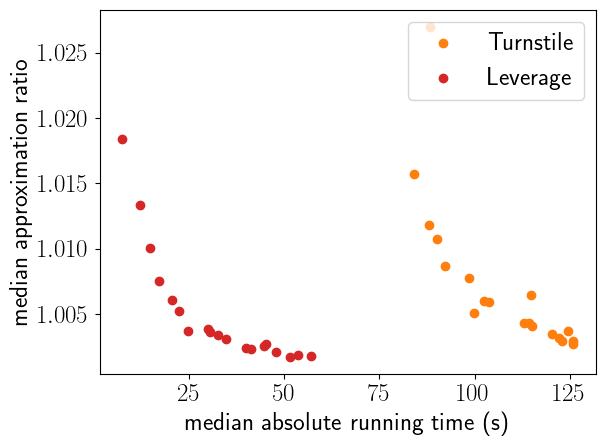

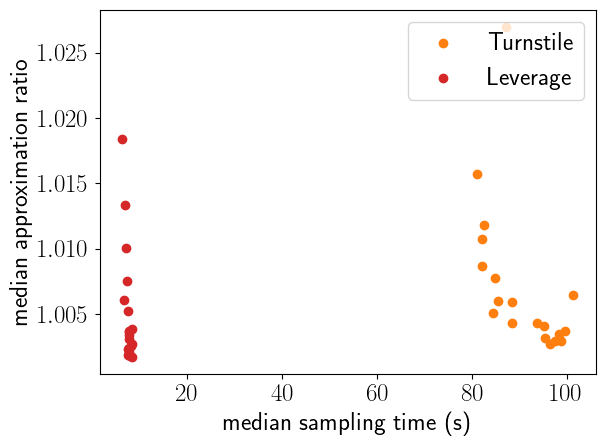

In [32]:
dataset = Covertype_Sklearn()
make_plot(dataset, x_min=None, x_max=None, y_min=None, y_max=None, sampling_time=False)
make_plot(dataset, x_min=None, x_max=None, y_min=None, y_max=None, sampling_time=True)

C:\Users\Traitor\AppData\Local\Temp\ipykernel_2648\1822597433.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(name="tab10")


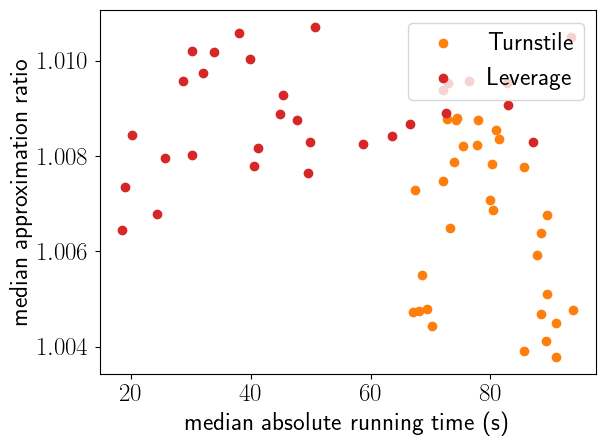

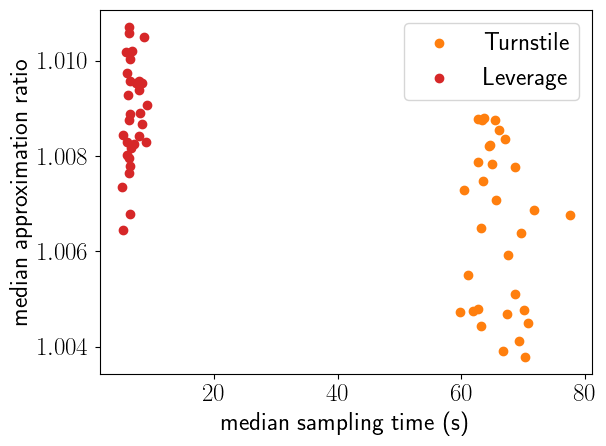

In [33]:
dataset = KDDCup_Sklearn()
make_plot(dataset, x_min=None, x_max=None, y_min=None, y_max=None, sampling_time=False)
make_plot(dataset, x_min=None, x_max=None, y_min=None, y_max=None, sampling_time=True)

C:\Users\Traitor\AppData\Local\Temp\ipykernel_2648\1822597433.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap(name="tab10")


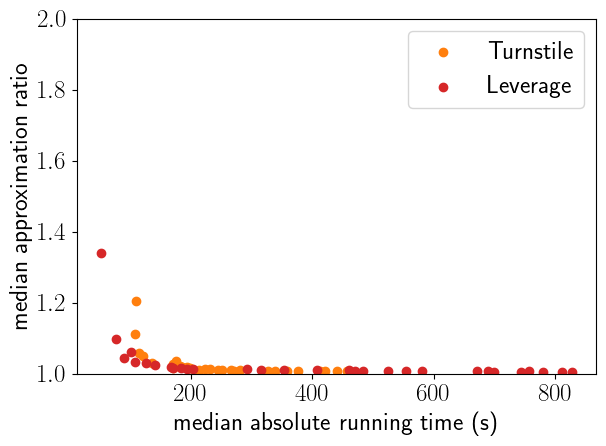

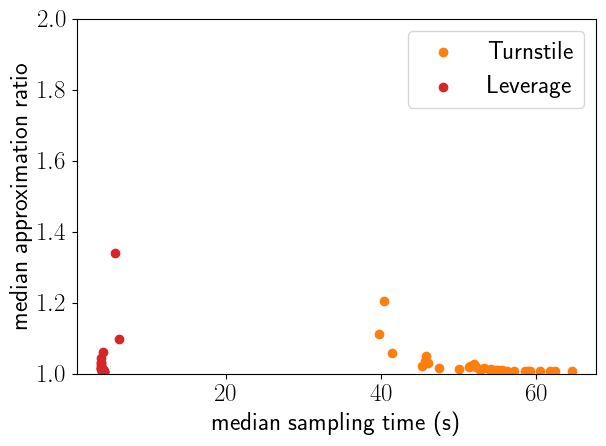

In [34]:
dataset = Webspam_libsvm()
make_plot(dataset, x_min=None, x_max=None, y_min=1, y_max=2, sampling_time=False)
make_plot(dataset, x_min=None, x_max=None, y_min=1, y_max=2, sampling_time=True)